Read in the logL space,  find the expectation value,  plot to verify,  compare to results of using scipy.optimize.minimize ... 

In [1]:
## Imports
import numpy as np 
import os
import datetime
from itertools import product
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from matplotlib import rcParams      
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

import celerite
from celerite import terms
from astropy.table import Table
from astropy.table import vstack
from astropy.table import Column

In [170]:
# Read in the results of LC fitting with Celerite....
fname = 'ZI_fits_results.npy'
resDir = '../data_products/Fig_Celerite_ZI_LC_fits/2017-11-14/'
results = np.load(resDir+fname).item()

In [171]:
# Read the results of Chelsea fitting 
fits = Table.read('../data_products/Fig_Celerite_ZI_LC_fits/fits.dat',
                  format='ascii')
tau_fit = np.power(10,fits['col3'].data)
sigma_hat = np.power(10, fits['col4'].data)
sigma_fit = sigma_hat / np.sqrt(2 / (tau_fit/365.0)) 


In [172]:
# Read the combined results ...
fname = 'celerite_chelsea_fit_results.txt'
comb_results = Table.read(resDir + fname, format='ascii')

In [173]:
# Make a grid for logL...
# only once ...
step  = 0.01
start = 0.4
stop = 2.5
tau_in = 100
sigma_in = 0.2
N = int((stop - start) /step)
grid = np.linspace(start, stop, N)

sigma_grid = grid * sigma_in
tau_grid = grid * tau_in

In [12]:
# Make a directory for today :
# Make a todays dir to save the figure ...
import os 
import datetime
from astroML.plotting.mcmc import convert_to_stdev
import matplotlib.lines as mlines
    
outDir = os.path.join(os.getcwd()[:-len('code')],'data_products/DRW_ZI_LC_logL_plots',
                      datetime.datetime.now().strftime('%Y-%m-%d')+ '/')
if not os.path.exists(outDir): os.system('mkdir %s' % outDir)
print('We will save this figure in  %s'%outDir)


In [232]:
fname

'DRWtestCeleriteZI_LC411_logL.npy'

Saving in /Users/chris/GradResearch/DRW_Celerite/data_products/DRW_ZI_LC_logL_plots/2017-11-14/
DRWtestCeleriteZI_LC551_logL.npy
Saved as DRWtestCeleriteZI_LC551_flat.png
Saved as DRWtestCeleriteZI_LC551_p1.png
Saved as DRWtestCeleriteZI_LC551_p2.png
Saved as DRWtestCeleriteZI_LC551_Jeff1.png
Saved as DRWtestCeleriteZI_LC551_Jeff2.png
DRWtestCeleriteZI_LC550_logL.npy
Saved as DRWtestCeleriteZI_LC550_flat.png
Saved as DRWtestCeleriteZI_LC550_p1.png
Saved as DRWtestCeleriteZI_LC550_p2.png
Saved as DRWtestCeleriteZI_LC550_Jeff1.png
Saved as DRWtestCeleriteZI_LC550_Jeff2.png
DRWtestCeleriteZI_LC263_logL.npy
Saved as DRWtestCeleriteZI_LC263_flat.png
Saved as DRWtestCeleriteZI_LC263_p1.png
Saved as DRWtestCeleriteZI_LC263_p2.png
Saved as DRWtestCeleriteZI_LC263_Jeff1.png
Saved as DRWtestCeleriteZI_LC263_Jeff2.png
DRWtestCeleriteZI_LC262_logL.npy
Saved as DRWtestCeleriteZI_LC262_flat.png
Saved as DRWtestCeleriteZI_LC262_p1.png
Saved as DRWtestCeleriteZI_LC262_p2.png
Saved as DRWtestCeleriteZI

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Saved as DRWtestCeleriteZI_LC459_flat.png
Saved as DRWtestCeleriteZI_LC459_p1.png
Saved as DRWtestCeleriteZI_LC459_p2.png
Saved as DRWtestCeleriteZI_LC459_Jeff1.png
Saved as DRWtestCeleriteZI_LC459_Jeff2.png
DRWtestCeleriteZI_LC458_logL.npy
Saved as DRWtestCeleriteZI_LC458_flat.png
Saved as DRWtestCeleriteZI_LC458_p1.png
Saved as DRWtestCeleriteZI_LC458_p2.png
Saved as DRWtestCeleriteZI_LC458_Jeff1.png
Saved as DRWtestCeleriteZI_LC458_Jeff2.png
DRWtestCeleriteZI_LC78_logL.npy
Saved as DRWtestCeleriteZI_LC78_flat.png
Saved as DRWtestCeleriteZI_LC78_p1.png
Saved as DRWtestCeleriteZI_LC78_p2.png
Saved as DRWtestCeleriteZI_LC78_Jeff1.png
Saved as DRWtestCeleriteZI_LC78_Jeff2.png
DRWtestCeleriteZI_LC953_logL.npy
Saved as DRWtestCeleriteZI_LC953_flat.png
Saved as DRWtestCeleriteZI_LC953_p1.png
Saved as DRWtestCeleriteZI_LC953_p2.png
Saved as DRWtestCeleriteZI_LC953_Jeff1.png
Saved as DRWtestCeleriteZI_LC953_Jeff2.png
DRWtestCeleriteZI_LC952_logL.npy
Saved as DRWtestCeleriteZI_LC952_flat.png


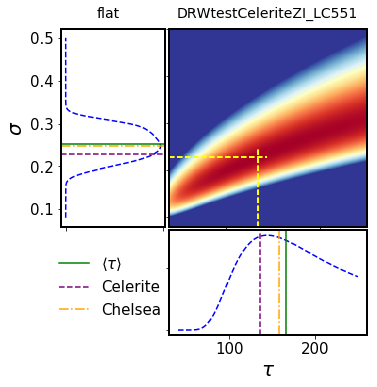

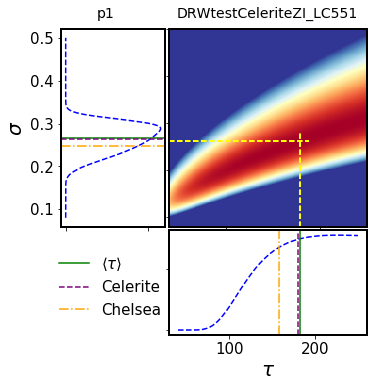

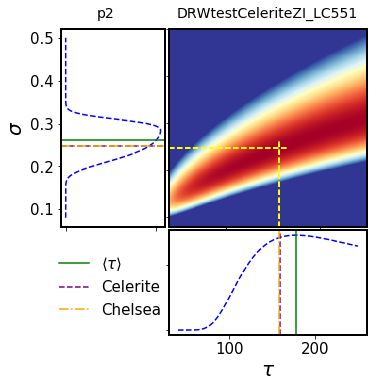

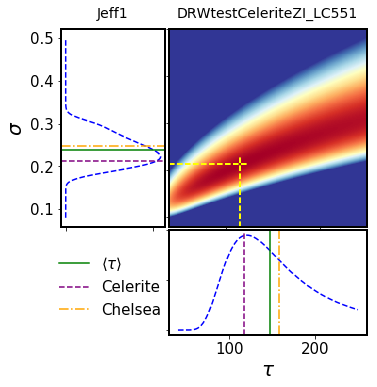

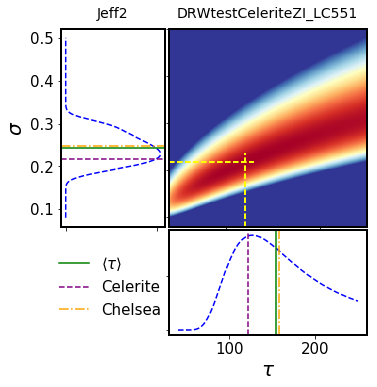

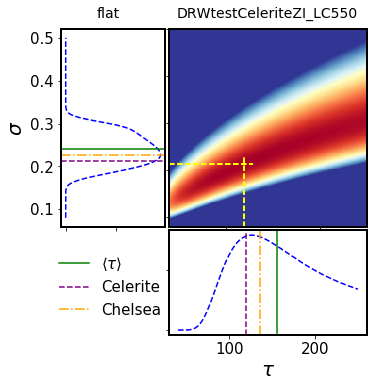

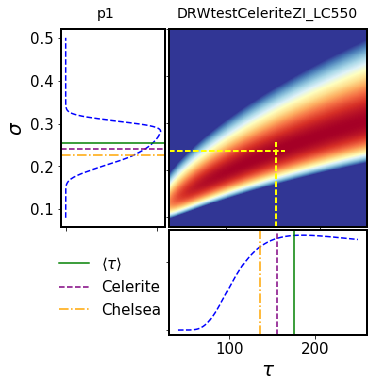

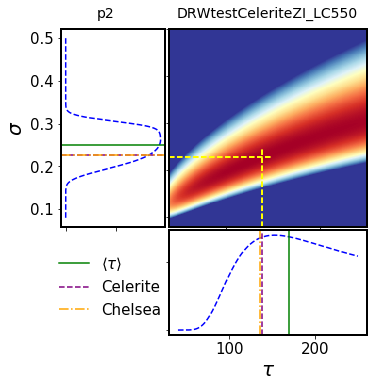

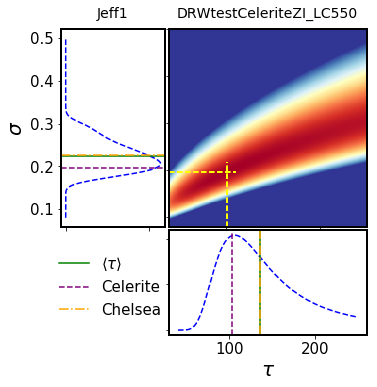

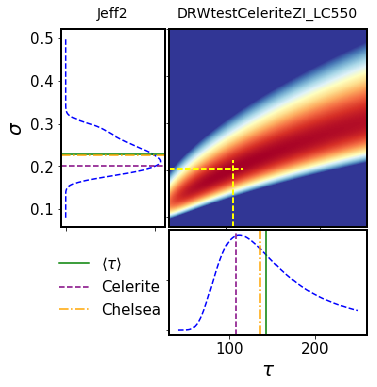

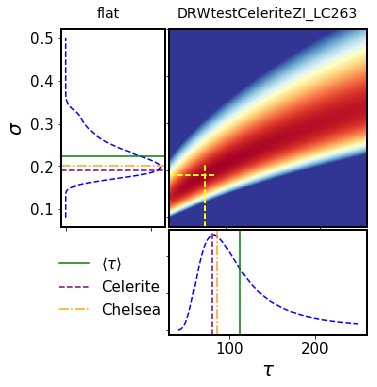

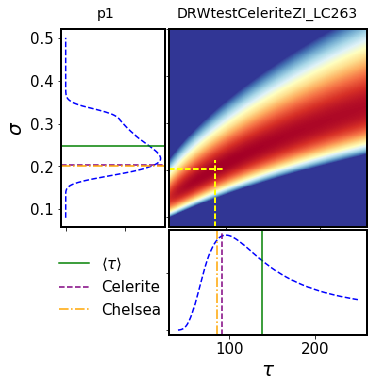

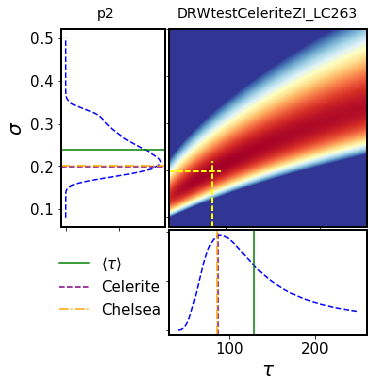

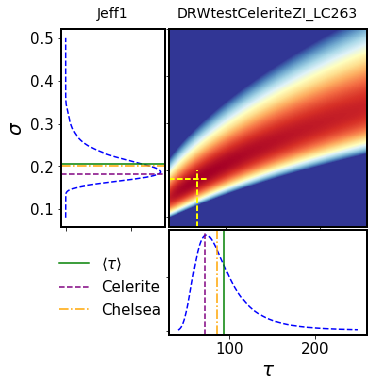

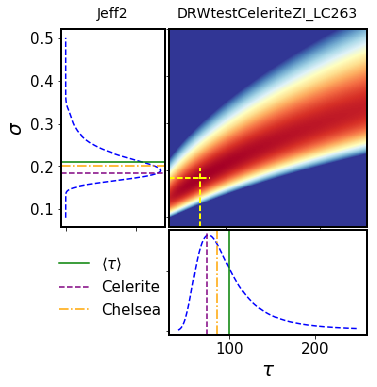

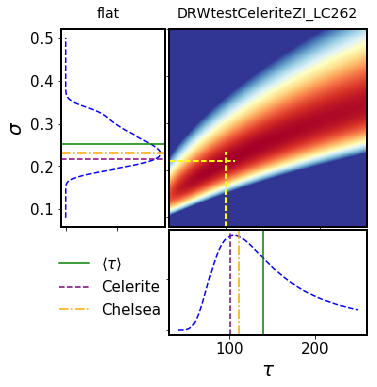

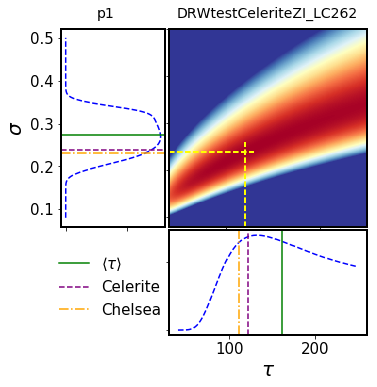

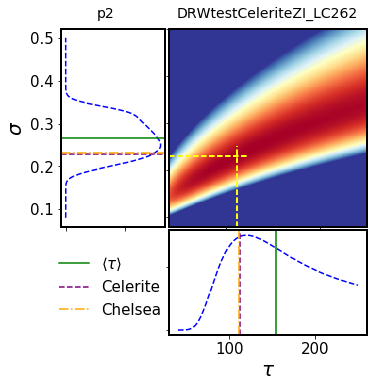

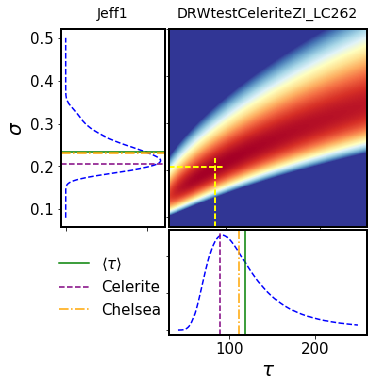

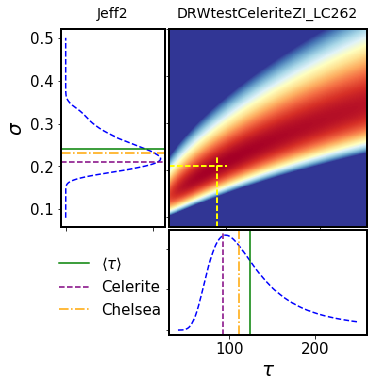

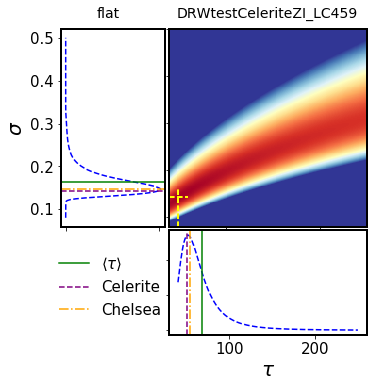

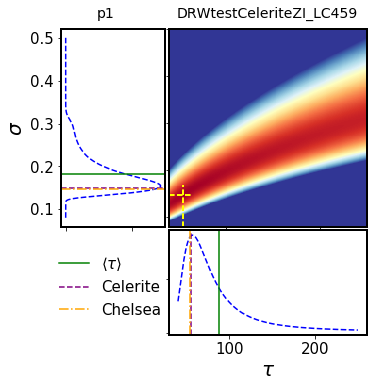

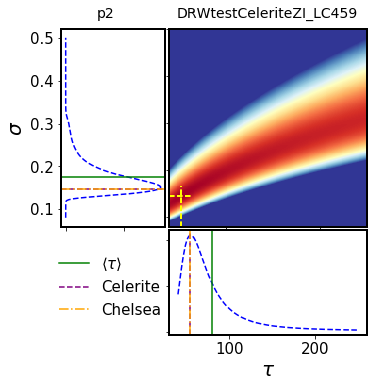

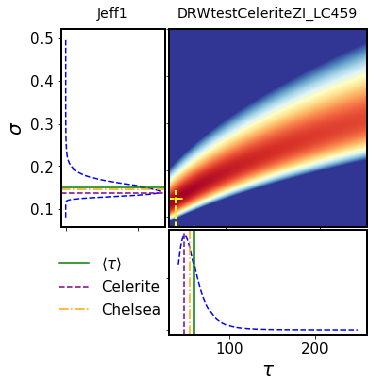

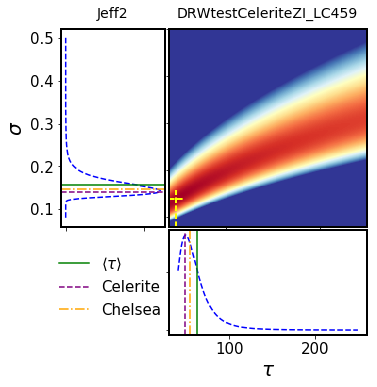

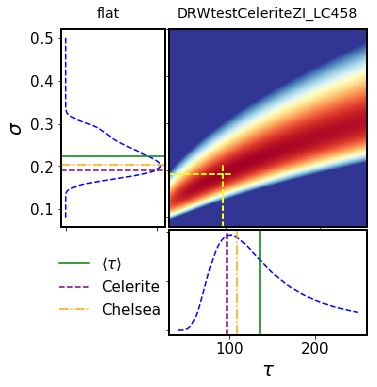

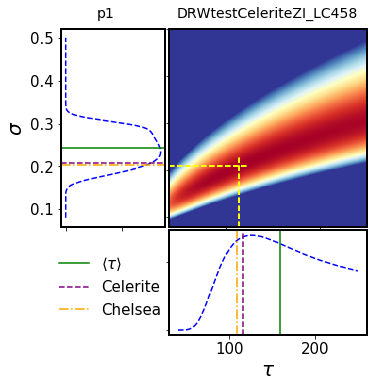

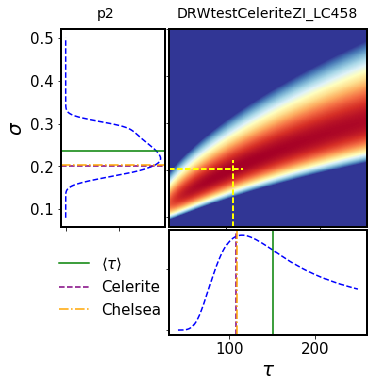

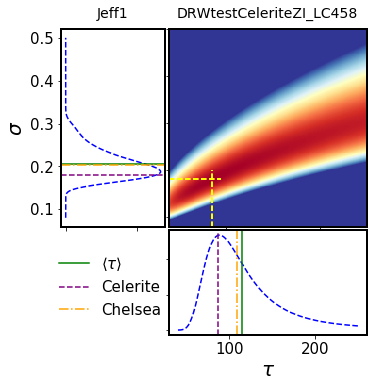

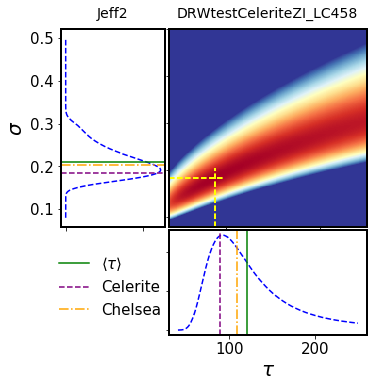

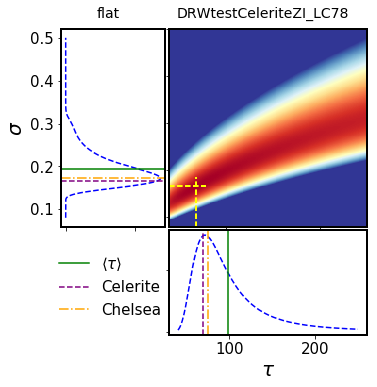

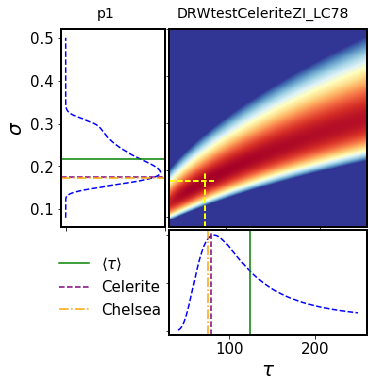

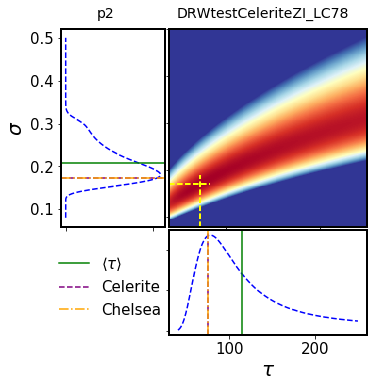

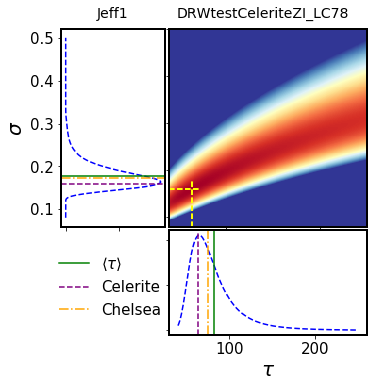

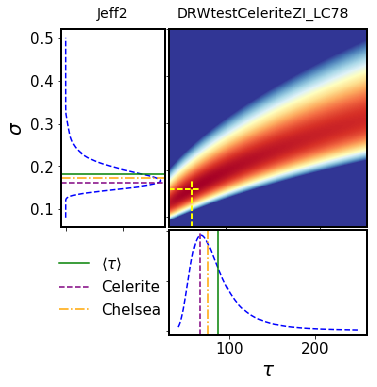

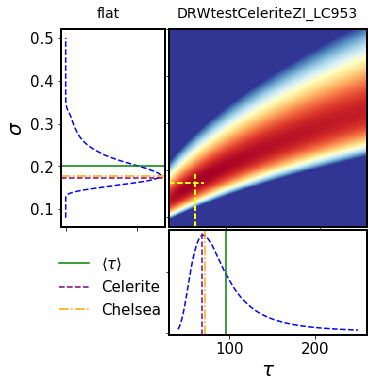

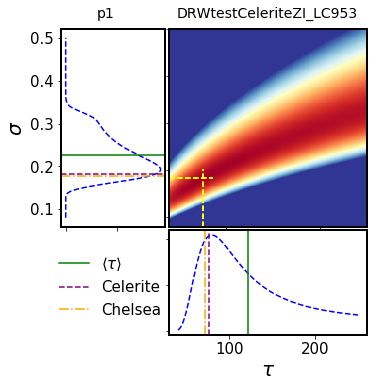

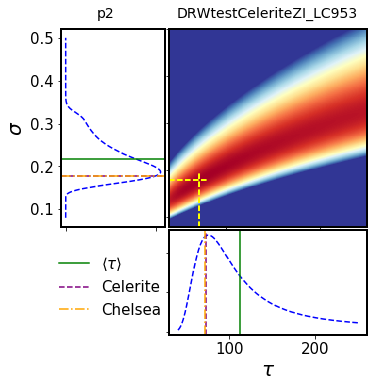

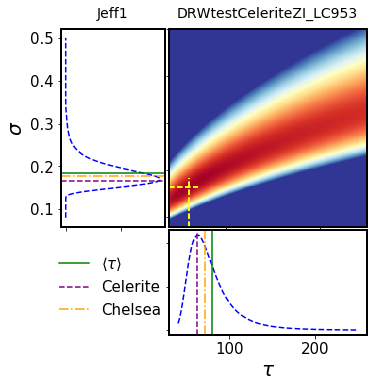

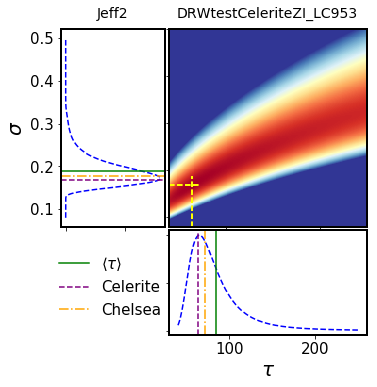

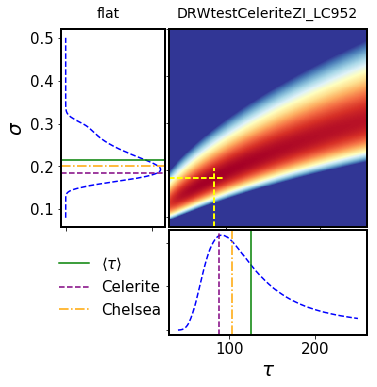

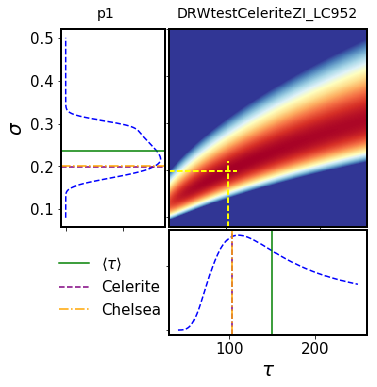

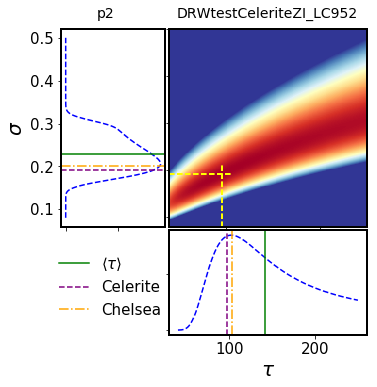

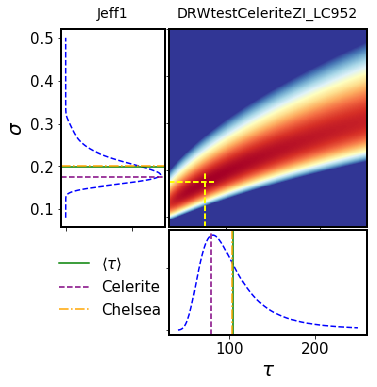

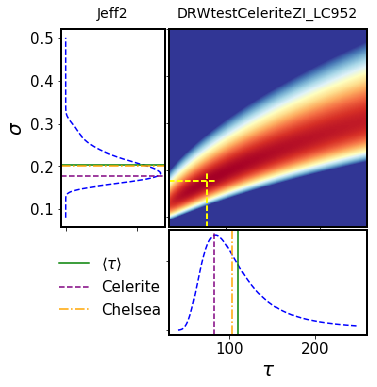

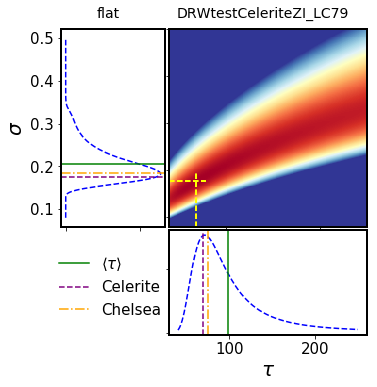

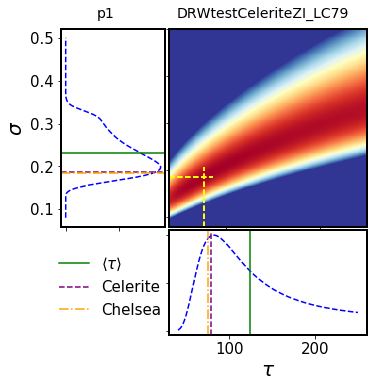

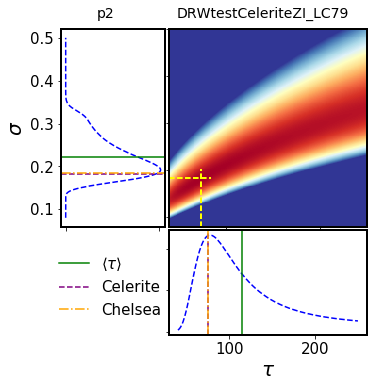

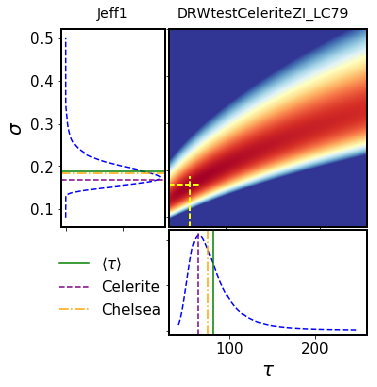

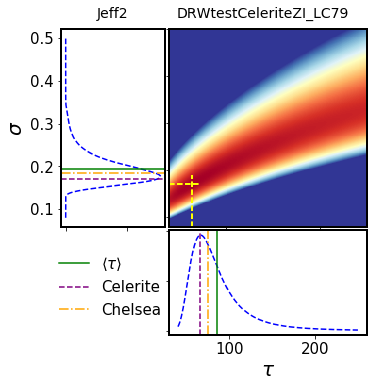

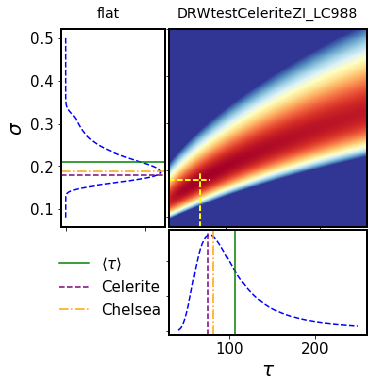

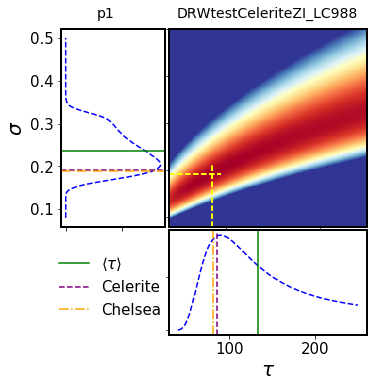

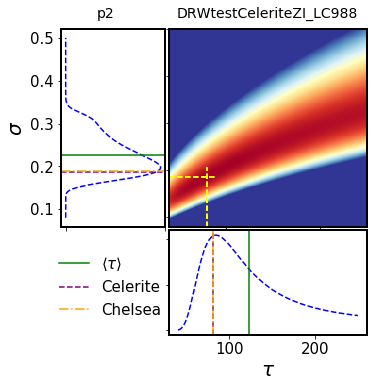

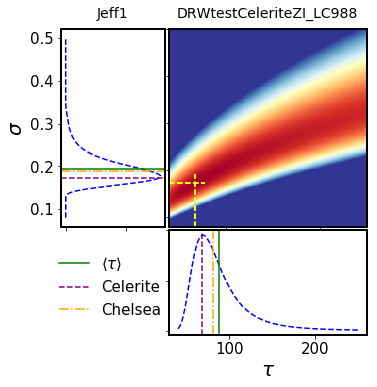

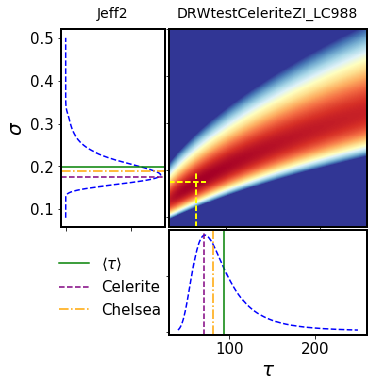

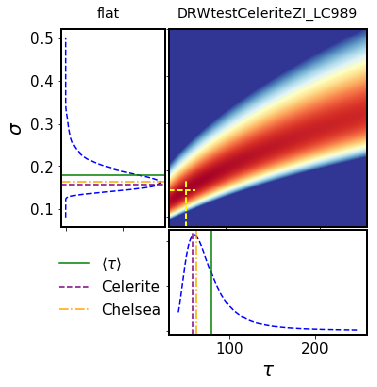

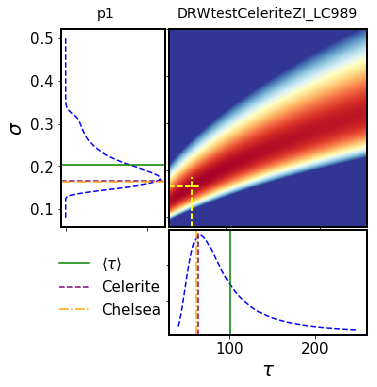

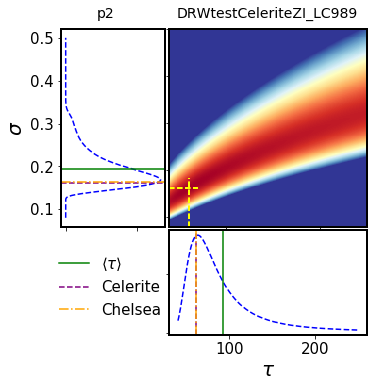

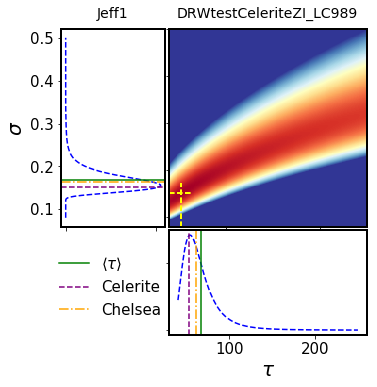

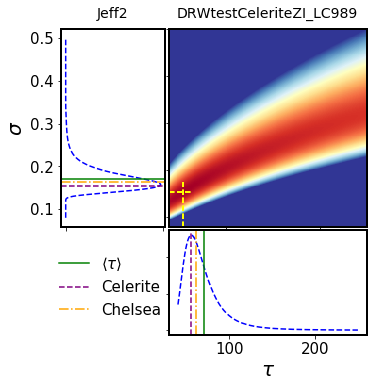

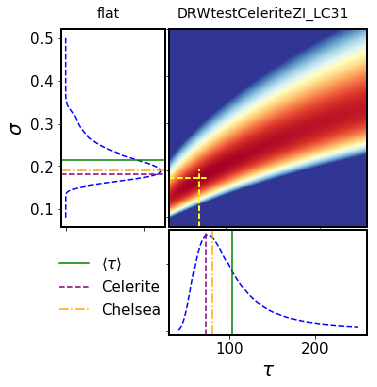

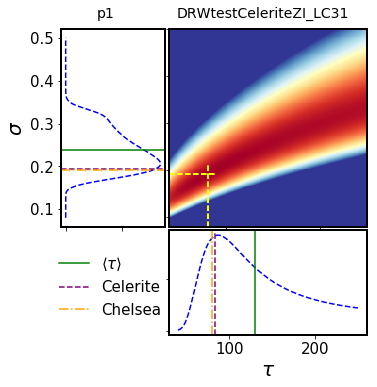

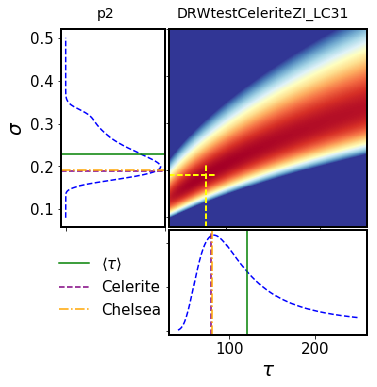

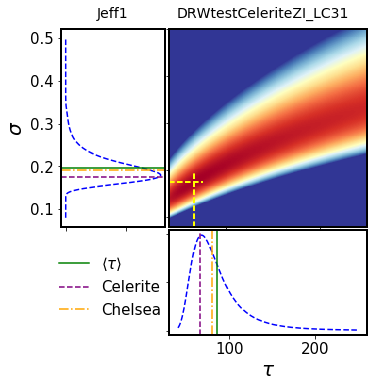

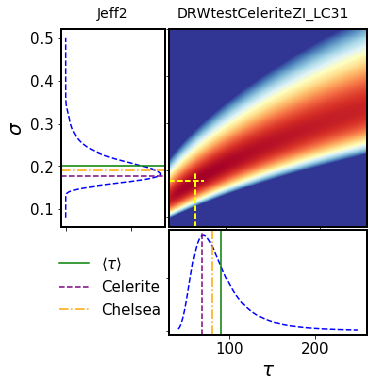

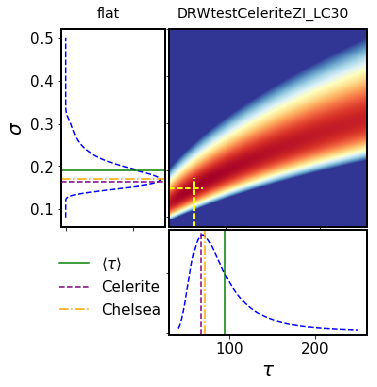

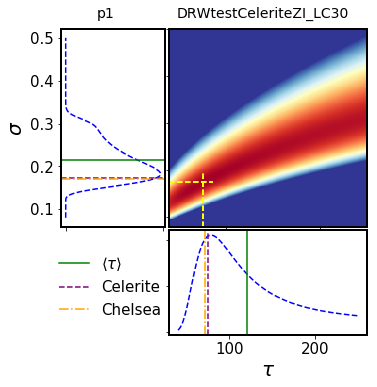

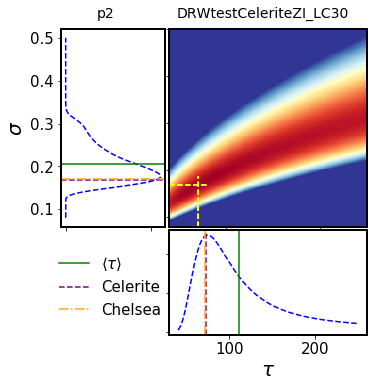

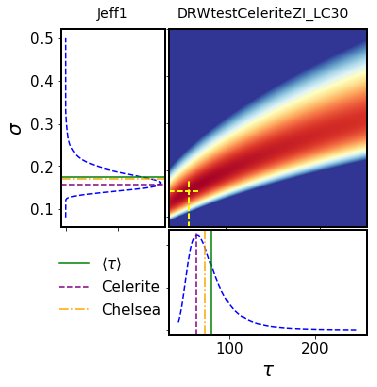

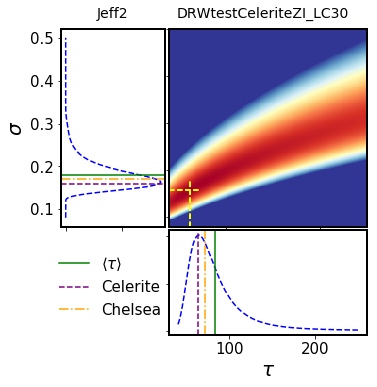

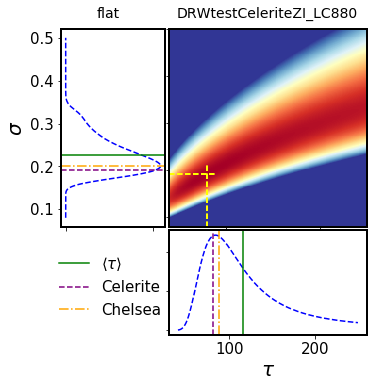

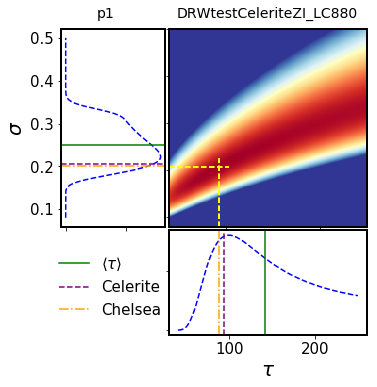

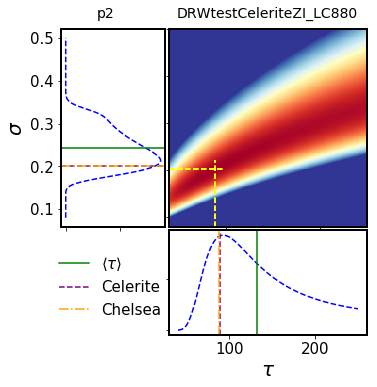

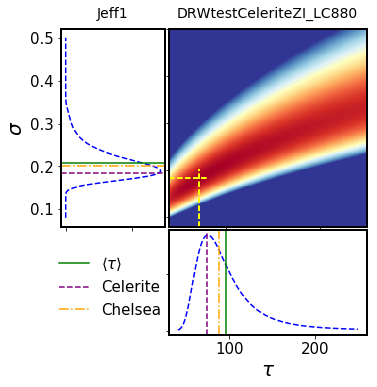

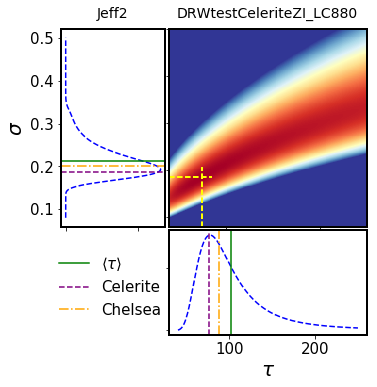

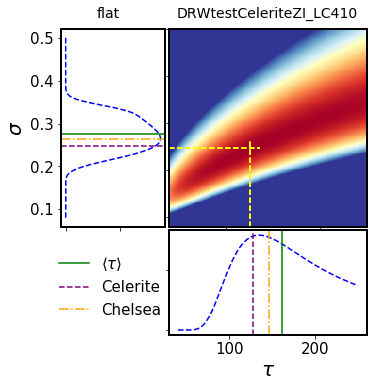

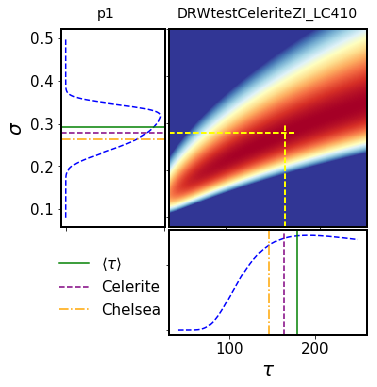

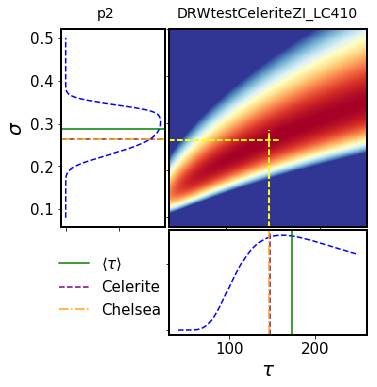

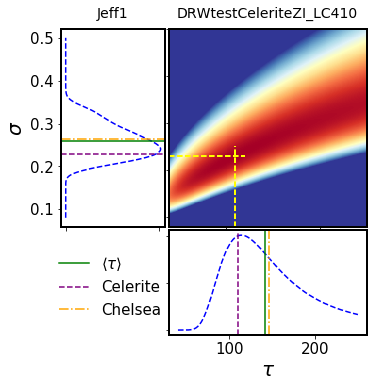

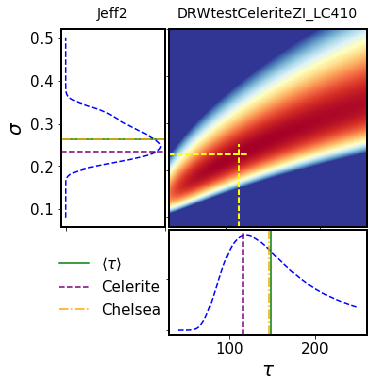

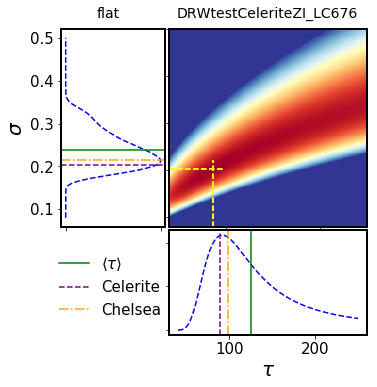

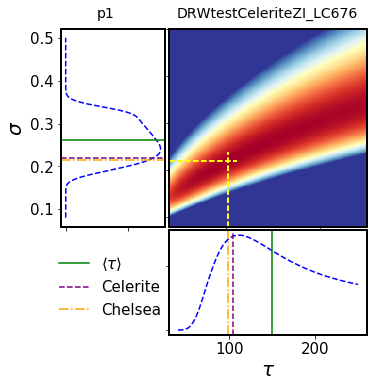

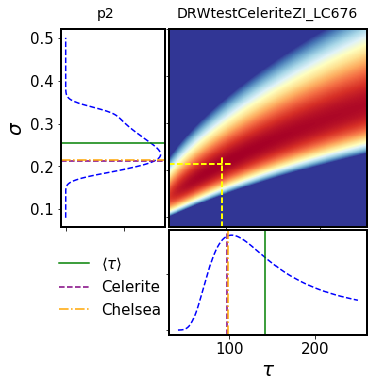

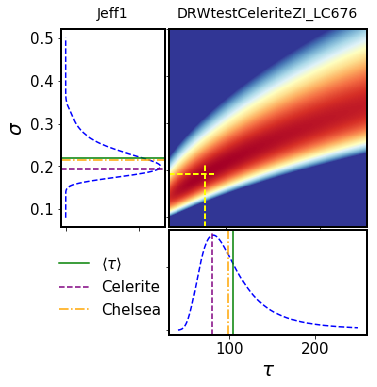

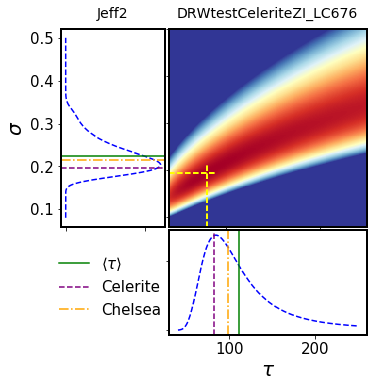

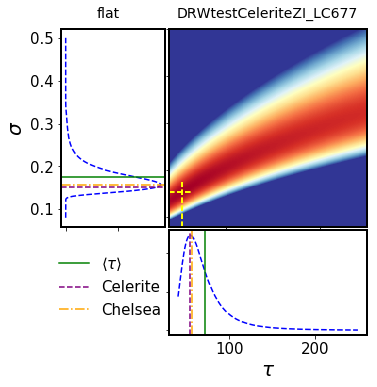

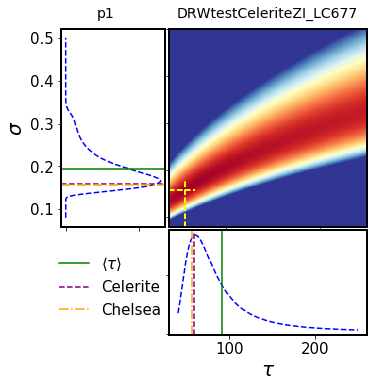

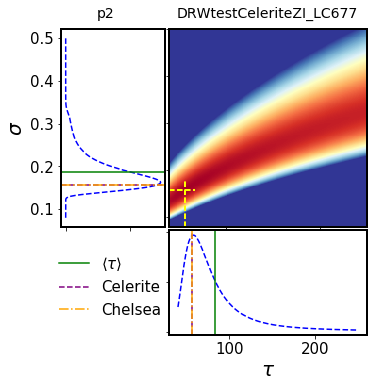

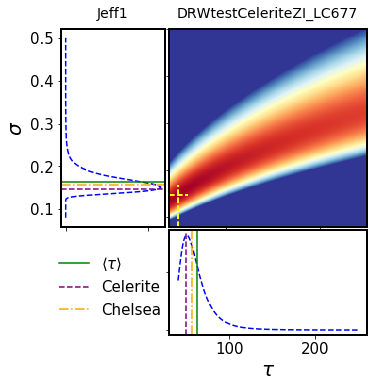

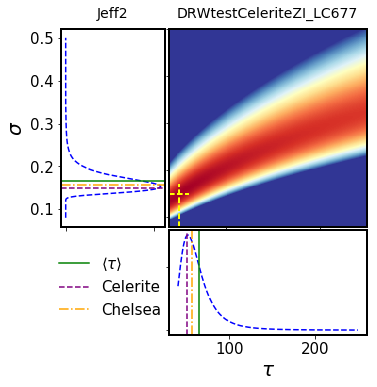

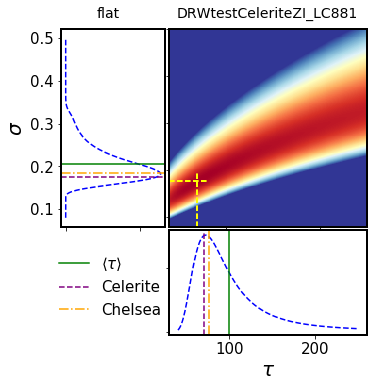

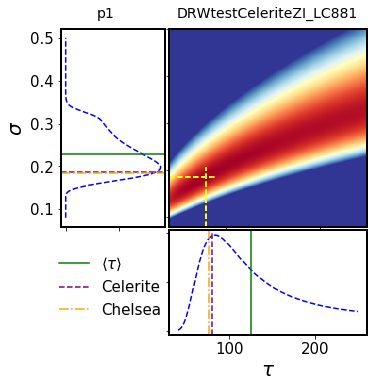

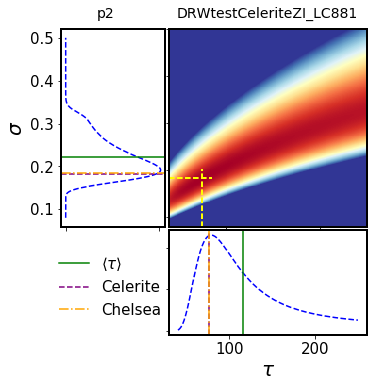

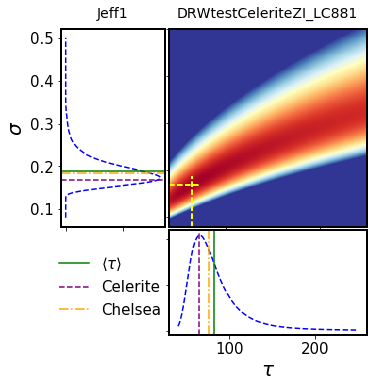

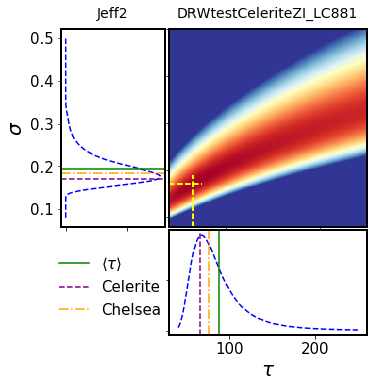

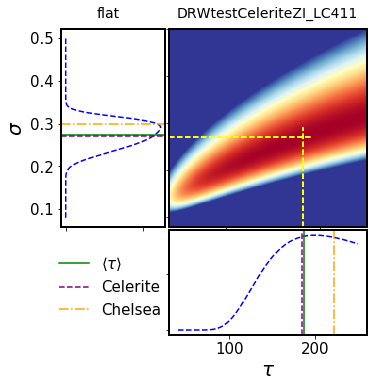

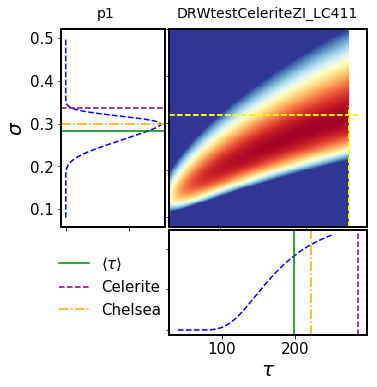

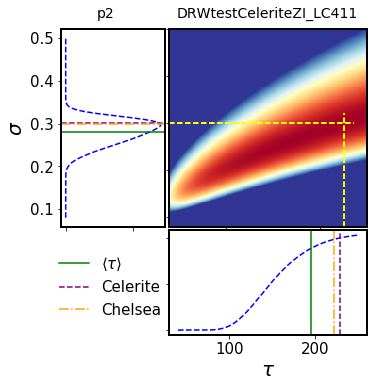

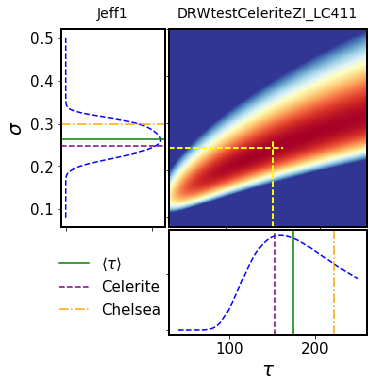

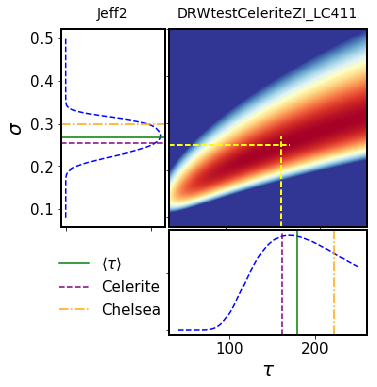

In [247]:
# test reading in the logL space ...
# plot setup inspired by 
# http://www.astroml.org/book_figures/chapter5/fig_cauchy_mcmc.html 

logDir = '../data_products/DRW_ZI_LC_full_logL/2017-11-13/'
print('Saving in %s'%outDir)
for i in range(20) : 
#fname = 'DRWtestCeleriteZI_LC'+str(989)+'_logL.npy'
    fname = os.listdir(logDir)[i]
    print(fname)
    logL_dic = np.load(logDir+fname).item()

    # Grab the Celerite LC results for that light curve ...
    mask = comb_results['name'] == fname[:-9]+'.dat' 

    for prior in logL_dic.keys(): # ['flat']:# logL_dic.keys() : 
        # we are storing negloglike...
        logL = -logL_dic[prior] 

        # find the maximum of loglike...
        idx = np.where(logL == np.max(logL))
        sigma_max = sigma_grid[idx[0]][0]
        tau_max = tau_grid[idx[1]][0]

        # find the expectation value ... 
        dsigma =  sigma_grid[1] - sigma_grid[0]
        dtau = tau_grid[1] - tau_grid[0]

        p_sigma = np.exp(logL).sum(1)
        p_sigma /= p_sigma.sum() * (dsigma)

        p_tau = np.exp(logL).sum(0)
        p_tau /= p_tau.sum() * (dtau)

        exp_tau = np.sum(tau_grid * p_tau * dtau)
        exp_sigma = np.sum(sigma_grid * p_sigma * dsigma)

        # read the results from Chelsea and Celerite .... 
        sigma_fit = comb_results[mask][prior+'-sigma_fit'].data[0]
        tau_fit = comb_results[mask][prior+'-tau_fit'].data[0]
        sigma_ch = comb_results[mask]['Chelsea_sigma'].data[0]
        tau_ch = comb_results[mask]['Chelsea_tau'].data[0]

        # plot the results
        fig = plt.figure(figsize=(5, 5))

        # first axis: likelihood contours
        ax1 = fig.add_axes((0.4, 0.4, 0.55, 0.55))
        ax1.xaxis.set_major_formatter(plt.NullFormatter())
        ax1.yaxis.set_major_formatter(plt.NullFormatter())

        x = logL_dic[prior]
        shift = x-min(np.ravel(x))
        norm = np.sum(shift)
        z = shift / norm

        ax1.imshow(z, extent=(tau_grid[0], tau_grid[-1], 
                              sigma_grid[0], sigma_grid[-1]),
                 cmap=plt.cm.get_cmap('RdYlBu'),vmax=0.00001,
                aspect='auto', origin='lower')

        # plot the cross at the 2D max of logL ...
        dx = 10 * dtau 
        dy = 10 * dsigma
        ax1.plot([tau_max, tau_max],[sigma_grid[0], sigma_max+dy], 
                 lw=2, c='yellow',ls='--')
        ax1.plot([tau_grid[0], tau_max+dx],[sigma_max, sigma_max], 
                 lw=2, c='yellow', ls='--')

        # second axis: marginalized over sigma
        ax2 = fig.add_axes((0.1, 0.4, 0.29, 0.55))
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
        ax2.plot(p_sigma, sigma_grid, '--b')
        ax2.set_ylabel(r'$\sigma$')

        color_dic = {'exp':'green', 'Celerite':'purple', 'Chelsea':'orange'}
        ls_dic = {'exp': '-', 'Celerite':'--', 'Chelsea':'-.'}
        label_dic = {'exp':r'$\langle \tau \rangle$','Celerite':'Celerite', 
                    'Chelsea':'Chelsea'}
        source_dic = {'exp':exp_sigma, 'Celerite': sigma_fit, 'Chelsea':sigma_ch}
        ax_legend_handles = []

        for source in ['exp', 'Celerite', 'Chelsea']:
            ax2.axhline(source_dic[source], ls=ls_dic[source], label=label_dic[source],
                       color=color_dic[source])
            line = mlines.Line2D([], [], color=color_dic[source],  ls=ls_dic[source],
                                 label=label_dic[source])
            ax_legend_handles.append(line)

        # third axis: marginalized over tau
        ax3 = fig.add_axes((0.4, 0.1, 0.55, 0.29))
        ax3.yaxis.set_major_formatter(plt.NullFormatter())
        ax3.plot(tau_grid, p_tau, '--b')
        ax3.set_xlabel(r'$\tau$')

        source_dic = {'exp':exp_tau, 'Celerite': tau_fit, 'Chelsea':tau_ch}
        for source in ['exp', 'Celerite', 'Chelsea']:
            ax3.axvline(source_dic[source], ls=ls_dic[source], label=label_dic[source],
                       color=color_dic[source])

        # add legend... 
        colorbar_ax = fig.add_axes([0.1, 0.1, 0.29, 0.29])     #  (x0 ,y0  , dx,  dy )  
        colorbar_ax.legend(loc='upper left', handles = ax_legend_handles, frameon=False,
                         fontsize=15, bbox_to_anchor=(-0.15, 0.9))
        colorbar_ax.axis('off')
        fig.text(0.42,0.98,fname[:-9], fontsize=14)
        fig.text(0.2,0.98, prior, fontsize=14)
        figname = fname[:-9]+'_'+prior+'.png'
        plt.savefig(outDir+figname, bbox_inches='tight')
        print('Saved as %s'%figname)

This was useful to do for some light curves.... Now calculate the same ,  but skipping the  plotting part, store, and make histograms  of  $<\sigma> / \sigma_{in}$, $<\tau> / \tau_{in}$, as well as plot  $<\sigma>$ vs $<\tau>$ ...

### Calculate $<\sigma>$ , $<\tau>$, store the results ... 

In [293]:
# test reading in the logL space ...
# plot setup inspired by 
# http://www.astroml.org/book_figures/chapter5/fig_cauchy_mcmc.html 

logDir = '../data_products/DRW_ZI_LC_full_logL/2017-11-13/'
print('Saving in %s'%outDir)

files=  os.listdir(logDir)
mask_good = np.array([file[-4:] == '.npy' for file in files]).astype(bool)
files = np.array(files)[mask_good].astype(str)

loglike_results = {'lc_name': np.zeros_like(files)}
priors = ['flat', 'p1', 'p2', 'Jeff1', 'Jeff2']
for prior in priors : 
    loglike_results[prior] = {'exp_sigma':np.zeros(len(files), dtype=float),
                             'exp_tau':np.zeros(len(files), dtype=float)}

for i in range(len(files)) : 
#fname = 'DRWtestCeleriteZI_LC'+str(989)+'_logL.npy'
    fname = files[i]
    loglike_results['lc_name'][i] = fname[:-9] + '.dat'
    #print(fname)
    logL_dic = np.load(logDir+fname).item()

    for prior in priors: 
        # we are storing negloglike...
        logL = -logL_dic[prior] 

        # find the maximum of loglike...
        idx = np.where(logL == np.max(logL))
        sigma_max = sigma_grid[idx[0]][0]
        tau_max = tau_grid[idx[1]][0]

        # find the expectation value ... 
        dsigma =  sigma_grid[1] - sigma_grid[0]
        dtau = tau_grid[1] - tau_grid[0]

        p_sigma = np.exp(logL).sum(1)
        p_sigma /= p_sigma.sum() * (dsigma)

        p_tau = np.exp(logL).sum(0)
        p_tau /= p_tau.sum() * (dtau)

        exp_tau = np.sum(tau_grid * p_tau * dtau)
        exp_sigma = np.sum(sigma_grid * p_sigma * dsigma)

        loglike_results[prior]['exp_sigma'][i] = exp_sigma
        loglike_results[prior]['exp_tau'][i] = exp_tau
print('Done')

Saving in /Users/chris/GradResearch/DRW_Celerite/data_products/DRW_ZI_LC_logL_plots/2017-11-14/
Done


In [280]:
#loglike_results

In [281]:
# Merge with Chelsea and other results...

#comb_results

In [294]:
# Make an AstroPy table from Celerite fit results 
loglike_exp = Table()
loglike_exp['name'] = loglike_results['lc_name']
for prior in priors : 
    for key in loglike_results[prior].keys():
        colname = prior + '-'+key
        loglike_exp[colname] = loglike_results[prior][key]
        

In [295]:
# Merge on name 

from astropy.table import join
merged = join(comb_results, loglike_exp)


In [299]:
merged

<Table length=664>
            name             flat-sigma_fit ... Jeff2-exp_sigma Jeff2-exp_tau
           str33                float64     ...     float64        float64   
---------------------------- -------------- ... --------------- -------------
   DRWtestCeleriteZI_LC1.dat 0.176037565519 ...  0.194763917381 98.5432031029
 DRWtestCeleriteZI_LC100.dat 0.175969903008 ...  0.195336813472 100.776626154
DRWtestCeleriteZI_LC1000.dat 0.170364634904 ...  0.187630615697 90.8452289473
 DRWtestCeleriteZI_LC101.dat 0.179882454491 ...  0.198450037479 94.0616919537
 DRWtestCeleriteZI_LC102.dat 0.179676105186 ...  0.198640614849 99.5687216089
 DRWtestCeleriteZI_LC103.dat  0.23942871986 ...  0.254392783446 152.826761445
 DRWtestCeleriteZI_LC104.dat 0.205950695932 ...  0.226742957409 127.949878609
 DRWtestCeleriteZI_LC105.dat 0.184128008636 ...  0.203552426187 97.8018795933
 DRWtestCeleriteZI_LC106.dat 0.188847898456 ...  0.208698918902 98.5862534433
 DRWtestCeleriteZI_LC107.dat 0.183046814736 ...  0.202110431256 96.6159104471
                         ...            ... ...             ...           ...
 DRWtestCeleriteZI_LC989.dat 0.157427609483 ...  0.171399992763 70.0207402578
 DRWtestCeleriteZI_LC990.dat 0.215805419297 ...  0.237391055916 126.014734241
 DRWtestCeleriteZI_LC991.dat 0.169422978139 ...  0.187232863693 93.4317777127
 DRWtestCeleriteZI_LC992.dat 0.138327628108 ...  0.151458148769 57.7664751517
 DRWtestCeleriteZI_LC993.dat 0.190386376045 ...  0.210476725439 103.499280196
 DRWtestCeleriteZI_LC994.dat 0.254530917061 ...  0.271270864172 151.185548001
 DRWtestCeleriteZI_LC995.dat 0.180425275341 ...  0.199331667186 94.2381785504
 DRWtestCeleriteZI_LC996.dat 0.195291221488 ...  0.217081388249 118.498182021
 DRWtestCeleriteZI_LC997.dat 0.210781633942 ...  0.231391508073 127.785393129
 DRWtestCeleriteZI_LC999.dat 0.196466540329 ...  0.217117151219 114.158599925

Saved as /Users/chris/GradResearch/DRW_Celerite/data_products/DRW_ZI_LC_logL_plots/2017-11-14/sigma_tau_ratios_chelsea_celerite2.png


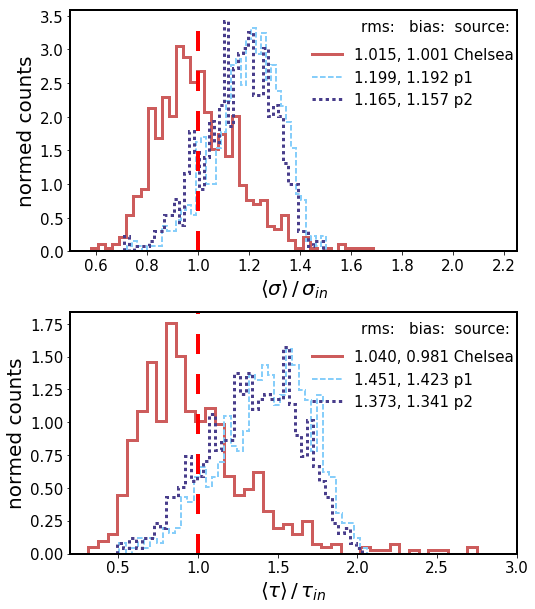

In [313]:
import matplotlib.lines as mlines
%matplotlib inline
# plot histograms : marginalize along either dimension ... 

fig ,ax  = plt.subplots(2,1,figsize=(8,10))

# two panels  : tau and sigma 
sigma_in = 0.2
tau_in = 100 

length = 20 
i = 0 
x0 = [0.2,0.62]

xmin, xmax = 0.5, 2.25  # maximum sigmafit / sigmain ratio
ymin, ymax  = 0.2, 3 # maximum taufit / tauin ratio 

# need to store lines for axis legends in an object 
ax_legend_handles = {0:[], 1:[]}

# line settings 
color_dic = {}
ls_dic = {}
lw_dic = {}
# need to store lines for axis legends in an object 
ax_legend_handles = {0:[], 1:[]}

# line settings 
color_dic = {}
ls_dic = {}
lw_dic = {}
data = ['Chelsea', 'flat', 'Jeff1', 'Jeff2', 'p1', 'p2']
colors = ['indianred', 'chocolate', 'y', 'green', 'lightskyblue','darkslateblue']
linestyles = ['solid','dotted','dashed','solid','dashed','dotted']
linewidths  = [3,3,2,1,2,3]
for i in range(len(data)):
    color_dic[data[i]] = colors[i]
    ls_dic[data[i]] = linestyles[i] 
    lw_dic[data[i]]= linewidths[i]

plot_quantities = {'tau':{}, 'sigma':{}}
priors = ['flat', 'p1', 'p2', 'Jeff1', 'Jeff2']
for prior in priors : 
    plot_quantities['tau'][prior] = merged[prior+'-exp_tau'] / tau_in
    plot_quantities['sigma'][prior] = merged[prior+'-exp_sigma'] / sigma_in
plot_quantities['sigma']['Chelsea'] =  merged['Chelsea_sigma'] / sigma_in
plot_quantities['tau']['Chelsea'] =  merged['Chelsea_tau']/ tau_in



for source in ['Chelsea', 'p1', 'p2']: # 'flat', 'Jeff1', 'Jeff2'] :  #   # 
    x = plot_quantities['sigma'][source]
    m = (xmin<x)*(x<xmax)
    x = x[m]
    ax[0].hist(x, histtype='step', lw=lw_dic[source], 
              ls=ls_dic[source], bins=40, color=color_dic[source],
              normed=True)
    rms  = np.sqrt(np.mean(np.square(x)))
    bias = np.mean(x)
    line = mlines.Line2D([], [], color=color_dic[source], 
                         lw=lw_dic[source],  ls=ls_dic[source],
                         label=str(rms)[:5]+', '+str(bias)[:5]+' '+source)
    ax_legend_handles[0].append(line)
    
    y = plot_quantities['tau'][source]
    m = (ymin<y)*(y<ymax)
    y = y[m]
    ax[1].hist(y,  histtype='step', color=color_dic[source], 
               lw=lw_dic[source],  ls=ls_dic[source], bins=40, 
               normed=True)
    rms  = np.sqrt(np.mean(np.square(y)))
    bias = np.mean(y)
    line = mlines.Line2D([], [], color=color_dic[source], 
                         lw=lw_dic[source],  ls=ls_dic[source],
                         label=str(rms)[:5]+', '+str(bias)[:5]+' '+source)
    ax_legend_handles[1].append(line)
    

ax[0].set_xlabel(r'$\langle \sigma \rangle \,/ \,\sigma_{in}$')
ax[1].set_xlabel(r'$\langle \tau \rangle \,/\, \tau_{in}$')
ax[0].set_xlim(xmin,xmax)
ax[1].set_xlim(ymin, ymax)

for i in [0,1]:
    ax[i].legend(loc='upper left', handles = ax_legend_handles[i], frameon=False,
                bbox_to_anchor=(0.51, 0.9), fontsize=15)
    ax[i].axvline(1, lw=4, ls='--', c='red', dashes=(5,5))
    ax[i].set_ylabel('normed counts')
    ax[i].text(0.65, 0.91, 'rms:   bias:  source: ',
               transform=ax[i].transAxes, fontsize=15)


    
fig.subplots_adjust(hspace=0.25)
#fig.suptitle('N = '+str(len(t))+', length = '+str(length)+  r'$ \tau_{in}$,'+' '\
#                 +str(len(x))+' fits' + '\n' \
#                 + 'err='+str(yerr[0])+' [mag], '+b, fontsize=20)
fname = outDir + 'sigma_tau_ratios_chelsea_celerite2.png'
plt.savefig(fname, bbox_inches='tight')
print('Saved as %s'%fname)

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in log10


flat sigma 0.220002507988
flat tau 122.971147135
p1 sigma 0.239758293172
p1 tau 145.035304206
p2 sigma 0.232897727404
p2 tau 137.231909851
Jeff1 sigma 0.20347700711
Jeff1 tau 104.939452016
Jeff2 sigma 0.208528114871
Jeff2 tau 110.501301013
Chelsea sigma 0.203044474333
Chelsea tau 104.072022118


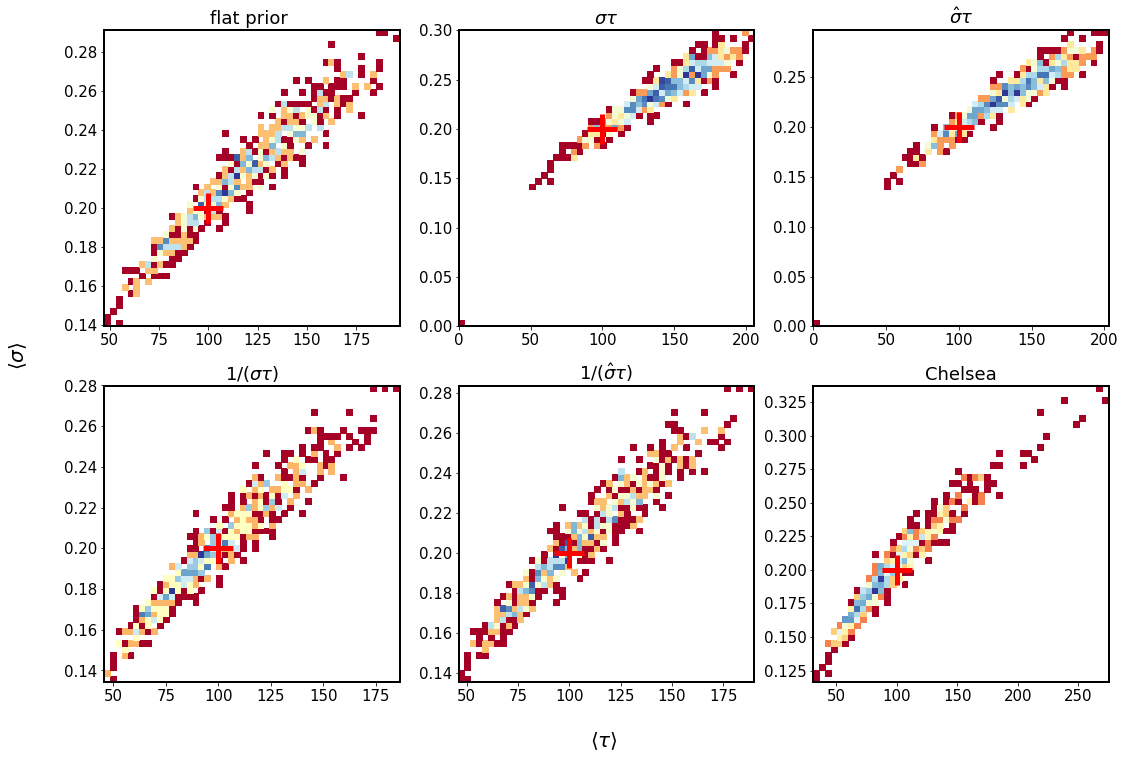

In [314]:
%matplotlib inline
from scipy.stats import binned_statistic_2d
fig,axs = plt.subplots(2,3,figsize=(18,12))
ax = np.ravel(axs)

plot = {'tau':{}, 
        'sigma':{}
       }
for prior in ['flat', 'p1','p2', 'Jeff1', 'Jeff2']:
    plot['tau'][prior] = merged[prior+'-exp_tau'] 
    plot['sigma'][prior] = merged[prior+'-exp_sigma'] 

plot['sigma']['Chelsea'] =  merged['Chelsea_sigma']
plot['tau']['Chelsea'] =  merged['Chelsea_tau']

ax_title = {'flat':'flat prior ', 
           'p1' : r'$\sigma \tau$',
           'p2': r'$\hat{\sigma} \tau$',
           'Jeff1': r'$1 / (\sigma \tau)$', 
           'Jeff2': r'$1/(\hat{\sigma} \tau)$',
           'Chelsea' : 'Chelsea'}

i=0
x0 = [0.2,0.4,0.6]

dict_a = {}
for source in ['flat', 'p1','p2', 'Jeff1', 'Jeff2', 'Chelsea']:
    dict_a[source]  = {}
    sigma = plot['sigma'][source]
    tau = plot['tau'][source]
    mx = sigma < 0.5 
    my = tau < 300 
    m = mx * my 
    x = sigma[m]
    y = tau[m]

    # Plot 2D histogram using pcolor
    stats = binned_statistic_2d(y,x,y, statistic='count', bins=50)
    z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
    z_sigma[np.isnan(z_sigma)] =0 # replace all nan's by 0 ...
    z_reduce  =  z_sigma
    z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
    z_rot = np.rot90(z_reduce)  # rotate and flip to properly display... 
    z_rot_flip = np.flipud(z_rot)
    z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)
    image = ax[i].pcolormesh(x_edges,y_edges, np.log10(z_masked), 
                             cmap=plt.cm.get_cmap('RdYlBu'))
    #cax = fig.add_axes([x0, 0.8, 0.4,0.02])
    #colorbar = fig.colorbar(image, cax=cax, orientation='horizontal')
    #from matplotlib import ticker
    #tick_locator = ticker.MaxNLocator(nbins=5)
    #colorbar.locator = tick_locator
    #colorbar.update_ticks()
    #colorbar.set_label(r'$\log_{10}(\mathrm{counts})$')
    print(source,'sigma', np.sqrt(np.mean(np.square(x))))
    print(source,'tau', np.sqrt(np.mean(np.square(y))))
    dict_a[source]['rms_sigma'] = np.sqrt(np.mean(np.square(x)))
    dict_a[source]['rms_tau'] = np.sqrt(np.mean(np.square(y)))
    dict_a[source]['std_sigma']  = np.std(x)
    dict_a[source]['std_tau'] = np.std(y)
    
    ax[i].plot(100,0.2,marker='+', markersize=30,
            markerfacecolor='white', 
            markeredgewidth=5.0,
           markeredgecolor='red')
    ax[i].set_title( ax_title[source])
    i+=1
fig.text(0.5,0.05, r'$\langle \tau \rangle$', fontsize=20)
fig.text(0.05, 0.5, r'$\langle \sigma \rangle$', rotation=90, fontsize=20)
fig.subplots_adjust(wspace=0.2)
plt.savefig(outDir+'sigma_vs_tau.png')
plt.show()

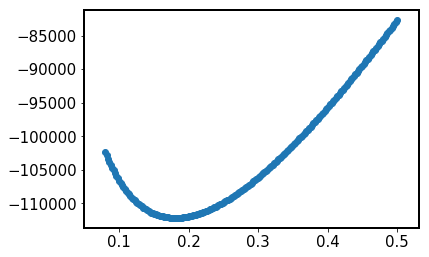

In [14]:
# find expectation from p_sigma,  p_tau...

# print a marginalized version ...
#plt.ylim(0,1e-2)
plt.scatter(sigma_grid, np.sum(x, axis=0))
#sigma =  results['Jeff2']['sigma_fit'][0]
#plt.axvline(sigma)

In [166]:
outDir

'../data_products/DRW_ZI_LC_full_logL/2017-11-13/'